In [1]:
import rmsd 
import matplotlib.pyplot as plt
import numpy as np
ang2bohr=1/.5291772

In [2]:
import sys


In [3]:
#sys.path.append("/home/administrator/anaconda3/envs/my-rdkit-env/include/")

In [4]:
sys.path.append("/home/administrator/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/")
sys.path.append("/home/administrator/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/rdkit/")

In [5]:
from pyscf.scf import RHF 

In [6]:
sys.path.append("/home/administrator/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/rdkit/Chem")

In [7]:
rmsd.main(args=["./BG/1_bg.xyz","./opt/1_opt.xyz"])

0.0997748966980053


In [8]:
rmsd.main(args=["./NR_H0/1_NR.xyz","./opt/1_opt.xyz"])

0.04022603342277081


In [9]:
init_error=[]
pred_error=[]
for i in range(1,18):
    rmsd.main(args=["./BG/{}_bg.xyz".format(i),"./opt/{}_opt.xyz".format(i)])
print("===========================================================================")    
for i in range(1,18):
    rmsd.main(args=["./pred/{}_p.xyz".format(i),"./opt/{}_opt.xyz".format(i)])
print("===========================================================================")    
for i in range(1,18):
    rmsd.main(args=["./NR_H0/{}_NR.xyz".format(i),"./opt/{}_opt.xyz".format(i)])

0.0997748966980053
0.13267514530940733
0.13792607095981138
0.11329744471049445
0.19074626248199716
0.1333933260382115
0.21797151979231477
0.1263673603393579
0.13952669074949425
0.1735515397965274
0.21983715405042517
0.15876304297141458
0.23568516763602565
0.12933844027698838
0.27815672340721415
0.09826235174611667
0.19389952637849392
0.04802596960271668
0.06469408456292522
0.0689631285185073
0.06508065523817615
0.13132735437837767
0.08640737419107673
0.15292434639534394
0.0751909422405848
0.08390932797615708
0.10920925530150775
0.15117381124015
0.09472227859300529
0.1646378658721037
0.07993302928665302
0.21313394253172607
0.06365959365202832
0.14159151060309572
0.04022603342277081
0.031185680708323917
0.042190865091795406
0.05145613760749568
0.07929233449486393
0.08154447769207128
0.09177090723147249
0.04323117655932086
0.04612952822585601
0.07534621475279421
0.0697110475836823
0.05646410895937868
0.07996004470325203
0.04242737086128657
0.12965531657203785
0.05523962110355713
0.0997313

In [10]:
init_error=[0.0997748966980053,
0.13267514530940733,
0.13792607095981138,
0.11329744471049445,
0.19074626248199716,
0.1333933260382115,
0.21797151979231477,
0.1263673603393579,
0.13952669074949425,
0.1735515397965274,
0.21983715405042517,
0.15876304297141458,
0.23568516763602565,
0.12933844027698838,
0.27815672340721415,
0.09826235174611667,
0.19389952637849392]

In [11]:
pred_error=[0.04802596960271668,
0.06469408456292522,
0.0689631285185073,
0.06508065523817615,
0.13132735437837767,
0.08640737419107673,
0.15292434639534394,
0.0751909422405848,
0.08390932797615708,
0.10920925530150775,
0.15117381124015,
0.09472227859300529,
0.1646378658721037,
0.07993302928665302,
0.21313394253172607,
0.06365959365202832,
0.14159151060309572]
pred_NR=[0.04022603342277081,
0.031185680708323917,
0.042190865091795406,
0.05145613760749568,
0.07929233449486393,
0.08154447769207128,
0.09177090723147249,
0.04323117655932086,
0.04612952822585601,
0.07534621475279421,
0.0697110475836823,
0.05646410895937868,
0.07996004470325203,
0.04242737086128657,
0.12965531657203785,
0.05523962110355713,
0.0997313524367603]

In [12]:
init_error=np.asarray(init_error)
pred_error=np.asarray(pred_error)
pred_NR=np.asarray(pred_NR)

(0, 0.3)

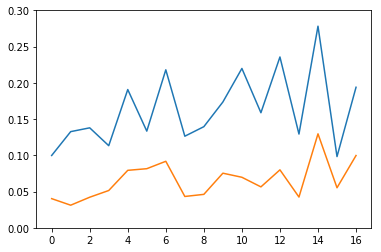

In [13]:
plt.plot(init_error)
#plt.plot(pred_error)
plt.plot(pred_NR)
plt.ylim(0,0.3)

In [14]:
np.linspace(1,17,17)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17.])

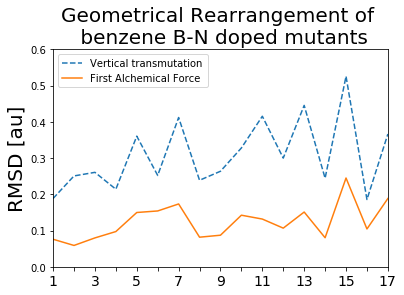

In [29]:
plt.title("Geometrical Rearrangement of \n benzene B-N doped mutants",size=20)
plt.plot(np.linspace(1,17,17),init_error*ang2bohr,ls="--",label="Vertical transmutation")
#plt.plot(pred_error)
plt.plot(np.linspace(1,17,17),pred_NR*ang2bohr,label="First Alchemical Force ")
plt.ylim(0,0.6)
plt.xlim(1,17)
plt.xticks(np.linspace(1,17,17),labels=['1','','3','','5','','7','','9','','11','','13','','15','','17',''],size=14)
plt.ylabel("RMSD [au]",size=20)
plt.legend()
plt.savefig("benz_rearr.png",bbox_inc="tight")

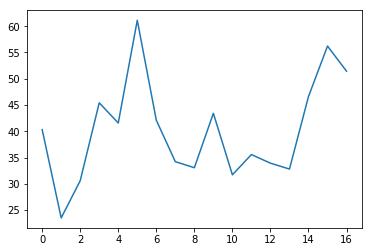

In [32]:
plt.plot((pred_NR/init_error)*100)

In [36]:
100-np.mean((pred_NR/init_error)*100) # 60% error reduction

59.78904714119053

In [23]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [14]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m

In [17]:
AllChem.Compute2DCoords(m)

0

In [25]:
print(dir(Draw))

['BytesIO', 'Chem', 'DrawMorganBit', 'DrawMorganBits', 'DrawMorganEnv', 'DrawMorganEnvs', 'DrawRDKitBit', 'DrawRDKitBits', 'DrawRDKitEnv', 'DrawRDKitEnvs', 'DrawingOptions', 'FingerprintEnv', 'IntStringMap', 'MolDraw2D', 'MolDraw2DCairo', 'MolDraw2DSVG', 'MolDrawOptions', 'MolDrawing', 'MolToFile', 'MolToImage', 'MolToImageFile', 'MolToMPL', 'MolToQPixmap', 'MolsToGridImage', 'MolsToImage', 'PrepareMolForDrawing', 'ReactionToImage', 'ShowMol', '_MolsToGridImage', '_MolsToGridSVG', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_bivariate_normal', '_createCanvas', '_drawerToImage', '_getCanvas', '_getMorganEnv', '_getRDKitEnv', '_legacyReactionToImage', '_moltoSVG', '_moltoimg', '_okToKekulizeMol', 'calcAtomGaussians', 'iteritems', 'map_indexing_suite_IntStringMap_entry', 'namedtuple', 'numpy', 'os', 'rdDepictor', 'rdMolDraw2D', 're', 'tkLabel', 'tkPI', 'tkRoot']
